In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [97]:
df=pd.read_csv(r"C:\Users\hp\Downloads\train.csv")

In [98]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [99]:
df.duplicated().sum()

0

In [100]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [101]:
x = df.drop('price_range',axis = 1)
y = df['price_range']

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size = 0.30)

In [103]:
from sklearn.metrics import accuracy_score,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 6)#post-pruning.
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [104]:
y_pred = clf.predict(x_test)

In [105]:
accuracy_score(y_test,y_pred)

0.8666666666666667

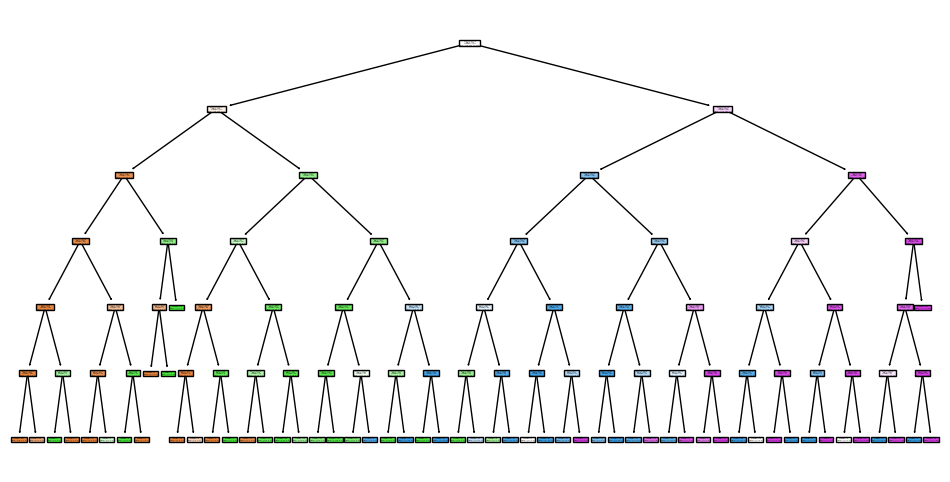

In [106]:
from sklearn import tree
plt.figure(figsize = (12,6))
tree.plot_tree(clf,filled=True)
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5,6],
          'max_features':['sqrt','log2','auto']
         }
model = GridSearchCV(clf,param_grid=params,scoring="accuracy")

In [108]:
model

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [109]:
model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [110]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [111]:
model = DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'log2',splitter= 'best')

In [112]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [113]:
y_pred=model.predict(x_test)

In [114]:
accuracy_score(y_pred,y_test)

0.37666666666666665